## **Introdução ao problema**
*   O AVC é uma condição médica grave que ocorre quando o suprimento de sangue para o cérebro é interrompido ou reduzido, levando à privação de oxigênio e nutrientes para as células cerebrais;

*   É uma das principais causas de morte e incapacidade em todo o mundo;

*   Nos últimos anos, a aplicação de modelos de aprendizado de máquina na área da saúde tem recebido atenção significativa, oferecendo caminhos promissores para a previsão do AVC.



## **Sobre a base:**
De acordo com a Organização Mundial da Saúde (OMS), o AVC é a 2ª principal causa de morte no mundo, responsável por aproximadamente 11% do total de mortes.
Este conjunto de dados é usado para prever se um paciente tem probabilidade de sofrer acidente vascular cerebral com base em parâmetros de entrada como sexo, idade, várias doenças e tabagismo. Cada linha dos dados fornece informações relevantes sobre o paciente.

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Dicionário de dados:
1) id: identificador único

2) gender: “Masculino”, “Feminino” ou “Outro”

3) age: idade do paciente

4) hypertension: 0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão

5) heart_disease: 0 se o paciente não tiver nenhuma doença cardíaca, 1 se o paciente tiver uma doença cardíaca

6) ever_married: “Não” ou “Sim”

7) work_type: "crianças", "Govt_jov", "Nunca_trabalhei", "Privado" ou "Autônomo"

8) Residence_type: “Rural” ou “Urbano”

9) avg_glucose_level: nível médio de glicose no sangue

10) bmi: índice de massa corporal

11) smoking_status: "anteriormente fumou", "nunca fumou", "fuma" ou "Desconhecido"

12) stroke: 1 se o paciente teve acidente vascular cerebral ou 0 se não

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Importar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



### Pré-Processamento de dados
Etapas de pré-processamento de dados, como tratamento de valores ausentes e da base

In [3]:
# Carregar a base de dados
df = pd.read_csv('/content/drive/MyDrive/Mineração de Dados/healthcare.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Excluir coluna ID
df = df.drop('id'	, axis = 1)

In [5]:
# Tamanho da base
df.shape

(5110, 11)

In [6]:
# Colunas
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
# Verificar a existência de valores Nulos
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# Preencher os valores NAs com as médias
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [9]:
# Valores da coluna gênero
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [10]:
# Alteração na base
df['age']= df['age'].astype(int) # Transformar a coluna idade para INT
df = df[df['gender'] != 'Other'] # Retirar o único valor diferente da coluna

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [12]:
# Informações das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   int64  
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 479.0+ KB


In [13]:
# Estatísticas das variáveis
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.218634,0.097475,0.054022,106.140399,28.894508,0.048738
std,22.634799,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##Exploração dos dados

<ipython-input-14-33aa3af7e696>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=abs(df.corr())


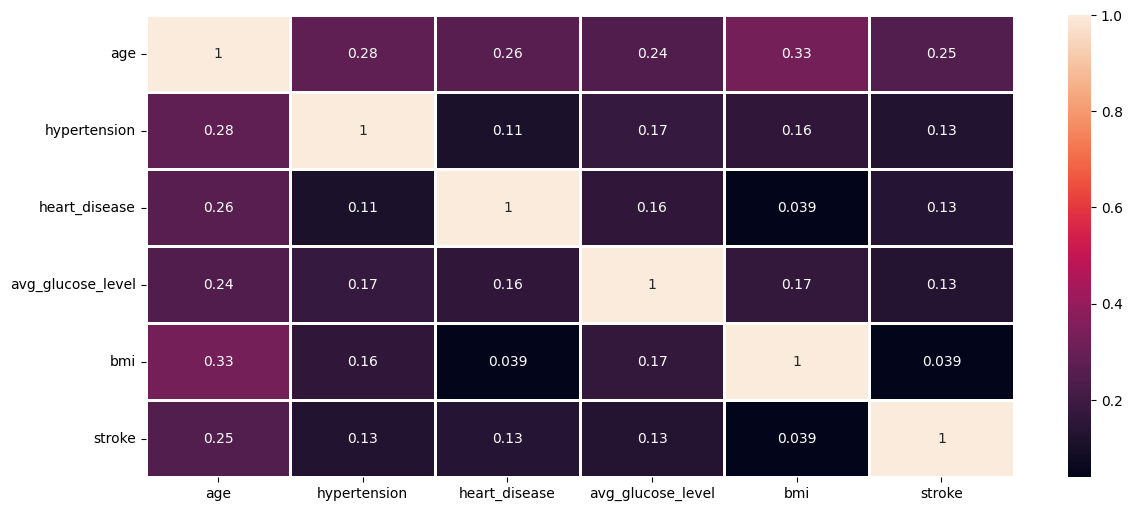

In [14]:
# Correlação
# É qualquer relação dentro de uma ampla classe de relações estatísticas que envolva dependência entre duas variáveis
plt.figure(figsize=(14,6))
corr=abs(df.corr())
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()

In [15]:
# Distribuição das idades
fig = px.histogram(df, x="age")

# Plotar o gráfico
fig.update_layout(
    title="Distribuição das Idades",
    xaxis_title="Idade",
    yaxis_title="Count",
    bargap=0.2,
    template='plotly_white',
    height=600, width=1000
)

fig.show(rendered='svg')

In [16]:
# Boxplot do BMI
# Visualização de Outliers
box = px.box(df, y = 'bmi', title = 'Boxplot BMI')
box.update_layout(height=600, width=1000)
box

In [17]:
# Boxplot Nível de glicose
# Visualização de Outliers
box = px.box(df, y = 'avg_glucose_level', title = 'Boxplot Nível de Glicose')
box.update_layout(height=600, width=1000)
box

In [18]:
# Boxplot idades por gênero
box = px.box(df, y = 'age', x = 'gender', color = 'gender', title = 'Boxplot Idades por Gênero')
box.update_layout(height=600, width=1000)
box

In [19]:
# Distribuição de Stroke
fig = px.pie(df, names="stroke")

# Plotar o gráfico
fig.update_traces(textinfo="percent+label")
fig.update_layout(title="Distribuição Stroke", template='plotly_white', height=600, width=1000)
fig.update_traces(
    hovertemplate="Target: %{label}<br>Count: \
    %{value}<br>Percent: %{percent}",
)

fig.show(rendered='svg')


In [20]:
# Distribuição de gênero
fig = px.pie(df, names="gender")

# Plotar o gráfico
fig.update_traces(textinfo="percent+label")
fig.update_layout(title="Distribuição de Gênero", template='plotly_white', height=600, width=1000)
fig.update_traces(
    hovertemplate="Target: %{label}<br>Count: \
    %{value}<br>Percent: %{percent}",
)

fig.show(rendered='svg')


In [21]:
# Pessoas casadas
colors = ['#84BCDA','#DA5552']
married = dict(df['ever_married'].value_counts())
fig = px.pie(names = married.keys(),values = married.values(),title = 'Casado', color_discrete_sequence= colors)
fig.update_layout(height=600, width=1000)
fig.update_traces(textposition='inside', textinfo='percent+label')

In [22]:
# Contagem dos gêneros
gender = df['gender'].value_counts()
gender

Female    2994
Male      2115
Name: gender, dtype: int64

In [23]:
# Gráfico de barra dos gêneros
barra = px.bar(gender, x = gender.index, y = gender.values, color = gender.index)

# Escala
barra.update_layout(height=500, width=800)

# Eixos
barra.update_xaxes(title_text='Gêneros')
barra.update_yaxes(title_text='Contagem')

# Título
barra.update_layout(title='Distribuição dos Gêneros')
barra

In [24]:
# Distribuição Tipo de residência
fig = px.pie(df, names="Residence_type")

# Plotar o gráfico
fig.update_traces(textinfo="percent+label")
fig.update_layout(title="Distribuição Tipo de Residência", template='plotly_white', height=600, width=1000)
fig.update_traces(
    hovertemplate="Target: %{label}<br>Count: \
    %{value}<br>Percent: %{percent}",
)

fig.show(rendered='svg')


In [25]:
# Agrupar os casos de AVC por gênero
gender_stroke = df.groupby(['gender', 'stroke']).size().unstack()
gender_stroke

stroke,0,1
gender,,
Female,2853,141
Male,2007,108


In [26]:
# Gráfico Casos de AVC por gênero
agrupar_stroke = (gender_stroke[1] / (gender_stroke[0] + gender_stroke[1]))*100
fig = px.pie(names = agrupar_stroke.index, values = agrupar_stroke.values, title = 'Casos de AVC por gênero')
fig.update_layout(height=600, width=800)
fig

In [27]:
# Contagem Tipo de Moradia
tipo = df["Residence_type"].value_counts()
tipo

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [28]:
# Calcular
residence_stroke_rates = df.groupby("Residence_type")["stroke"].mean().reset_index()
colors = ['#84BCDA']

fig = px.bar(residence_stroke_rates, x="Residence_type", y="stroke",
             title="Taxa de AVC por tipo de residência",
             color_discrete_sequence=colors)
# Escala
fig.update_layout(height=600, width=800)

# Eixos
fig.update_layout(xaxis_title="Tipo de residência", yaxis_title="Taxa de AVC")
fig.show()

In [29]:
# Contagem Tipo de Moradia
tipo = df["work_type"].value_counts()
tipo

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [30]:
fig = px.bar(tipo, x= tipo.index , y= tipo.values,
             title="Tipo de trabalho",
             labels={"work_type": "Work Type", "stroke": "Stroke Rate"},
             color_discrete_sequence=colors)
# Escala
fig.update_layout(height=600, width=800)

# Eixos
fig.update_layout(xaxis_title="Tipo de trabalho", yaxis_title="Count")
fig.show()

In [31]:
# Calcular
stroke_rates = df.groupby("work_type")["stroke"].mean().reset_index()

colors = ['#84BCDA', '#7768AE', '#B2FFA9', '#FFEC51', '#B3B5BB']

fig = px.bar(stroke_rates, x="work_type", y="stroke",
             title="Taxa de AVC por tipo de trabalho",
             labels={"work_type": "Work Type", "stroke": "Stroke Rate"},
             color_discrete_sequence=colors)
# Escala
fig.update_layout(height=600, width=800)

# Eixos
fig.update_layout(xaxis_title="Tipo de trabalho", yaxis_title="Taxa de AVC")
fig.show()

### **Normalização**
Normalização e codificação de variáveis categóricas.


In [32]:
# Bibliotecas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [33]:
# Converter dados categóricos ou em formato de texto para valores numéricos.
# Aplicamos em todas as colunas com dados categóricos
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

In [34]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,171.23,34.400000,3,1
4,0,79,1,0,1,3,0,174.12,24.000000,2,1


In [35]:
# Colunas
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

 ## **Tratamendo de Outliers**
 Reduzir o impacto dos outliers no aprendizado dos modelos

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Criar um objeto MinMaxScaler
scaler = MinMaxScaler()

# Colunas para normalizar
cols_to_normalize = [ 'age', 'avg_glucose_level', 'bmi']

# Ajustar e transformar as colunas selecionadas
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])


In [37]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.817073,0,1,1,2,1,0.801265,0.301260,1,1
1,0,0.743902,0,0,1,3,0,0.679023,0.212981,2,1
2,1,0.975610,0,1,1,2,0,0.234512,0.254296,2,1
3,0,0.597561,0,0,1,2,1,0.536008,0.276060,3,1
4,0,0.963415,1,0,1,3,0,0.549349,0.156930,2,1


## **Balanceamento da classe Target**
Ajuda a melhorar a capacidade do modelo de aprender com a classe minoritária e reduzir o viés em direção à classe majoritária. Realiza uma amostragem (sampling) de dados

In [38]:
# Separar os dados 0 e 1 para o balanceamento
data_0 = df[df.iloc[:,-1]==0]
data_1 = df[df.iloc[:,-1]==1]

df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [39]:
# Aplicação da técnica Resample
from sklearn.utils import resample

# Variável que queremos equilibrar
data_1 = resample(data_1,replace=True , n_samples=data_0.shape[0] , random_state=123 )

In [40]:
# Concatenar os valores com o dataframe0
df = np.concatenate((data_0,data_1))

# Juntar os dataframes
df = pd.DataFrame(df)
df.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke']

# Visualizar a varável target balanceada
stroke = dict(df['stroke'].value_counts())
fig = px.pie(names = ['False','True'],values = stroke.values(),title = 'Stroke',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=600, width=800)


## **Normalização da base por meio da técnica Standard Scaler**
Transforma cada valor nos dados de forma que a média dos dados padronizados seja zero e o desvio padrão seja igual a um. O objetivo dessa técnica é deixar os dados da base na mesma escala.

In [41]:
# Separação da base de teste e treino
X = df.drop('stroke', axis=1)
y = df['stroke']

# Aplicando o StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [42]:
# Separando a base
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Dicionário para armazenar os modelos
models = dict()

## **Aplicação do modelo**

Na classificação supervisionada, o modelo de machine learning é treinado usando um conjunto de dados rotulados, onde as saídas desejadas são conhecidas

## **Árvore de Decisão**

Árvores de Decisão são algoritmos de classificação e regressão que dividem um conjunto de dados em subconjuntos menores com base em regras de decisão.
Começam com um nó raiz que contém todo o conjunto de dados e, em cada nó, uma característica é escolhida para dividir os dados em dois ramos.


---

Antes de aplicar o modelo utilizamos a técnica do GridSearchCV, ele automatiza o processo de ajuste de hiperparâmetros e é uma ferramenta valiosa para encontrar os melhores hiperparâmetros para seu modelo. Ele ajuda a evitar a escolha arbitrária de hiperparâmetros e a minimizar o risco de overfitting.

In [44]:
# Buscar os melhores parâmetros
parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

parameter_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [None, 5, 10, 15, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [45]:
# Chamando o modelo e colocando os parâmetros
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, parameter_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_test_resampled)

In [46]:
# Métricas Árvore de decisão
accuracy = accuracy_score(y_test_resampled, y_pred)
precision = precision_score(y_test_resampled, y_pred)
recall = recall_score(y_test_resampled, y_pred)
f1 = f1_score(y_test_resampled, y_pred)
print("Best Parameters:", best_params)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 -score: {f1:.2f}')
models['Árvore de decisão'] = accuracy_score(y_pred, y_test_resampled)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.98
Precision: 0.95
Recall: 1.00
F1 -score: 0.98


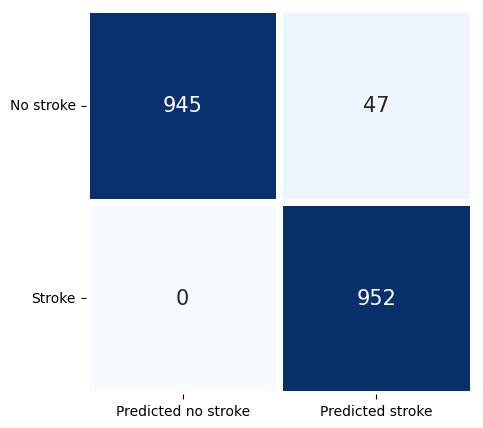

In [47]:
# Matriz de confusão
# Visualização do desempenho de um algoritmo de classificação
cm = confusion_matrix(y_test_resampled, y_pred)

# Crie um heatmap da matriz de confusão
plt.figure(figsize = (5, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

## **KNN**

O KNN é um algoritmo de classificação e regressão baseado em instâncias.
Ele classifica novas instâncias com base na maioria das classes K vizinhas mais próximas no espaço de características.

In [48]:
# Chamar o modelo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

In [49]:
# Métricas KNN
y_pred = knn.predict(X_test_resampled)

accuracy = accuracy_score(y_test_resampled, y_pred)
precision = precision_score(y_test_resampled, y_pred)
recall = recall_score(y_test_resampled, y_pred)
f1 = f1_score(y_test_resampled, y_pred)
print("Best Parameters:", best_params)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 -score: {f1:.2f}')
models['KNN'] = accuracy_score(y_pred, y_test_resampled)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.95
Precision: 0.91
Recall: 1.00
F1 -score: 0.95


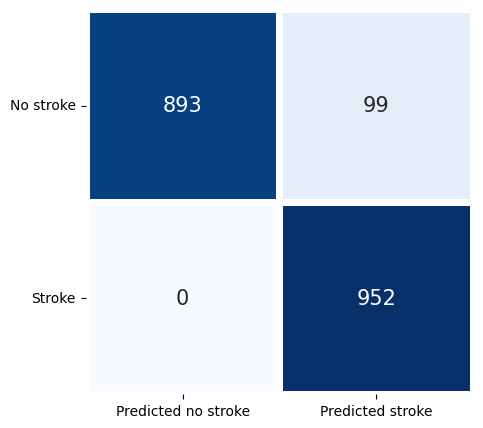

In [50]:
# Matriz de confusão
# Visualização do desempenho de um algoritmo de classificação
cm = confusion_matrix(y_test_resampled, y_pred)

# Crie um heatmap da matriz de confusão
plt.figure(figsize = (5, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

## **SVM**

SVM é um algoritmo de classificação e regressão que busca encontrar o hiperplano de decisão que maximiza a margem entre as classes.
Ele funciona projetando os dados em um espaço de características de alta dimensão e, em seguida, encontra o hiperplano que melhor separa as classes.

In [51]:
# Chamar o modelo
clf = SVC()
clf.fit(X_train_resampled, y_train_resampled)

SVC()

In [52]:
# Métricas SVC
y_pred = clf.predict(X_test_resampled)

accuracy = accuracy_score(y_test_resampled, y_pred)
precision = precision_score(y_test_resampled, y_pred)
recall = recall_score(y_test_resampled, y_pred)
f1 = f1_score(y_test_resampled, y_pred)
print("Best Parameters:", best_params)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 -score: {f1:.2f}')
models['SVM'] = accuracy_score(y_pred, y_test_resampled)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.83
Precision: 0.78
Recall: 0.90
F1 -score: 0.83


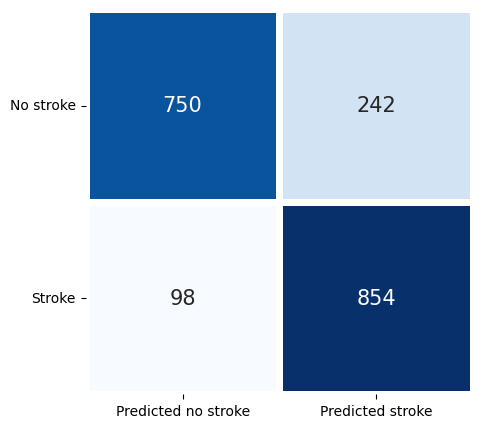

In [53]:
# Matriz de confusão
# Visualização do desempenho de um algoritmo de classificação
cm = confusion_matrix(y_test_resampled, y_pred)

# Crie um heatmap da matriz de confusão
plt.figure(figsize = (5, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

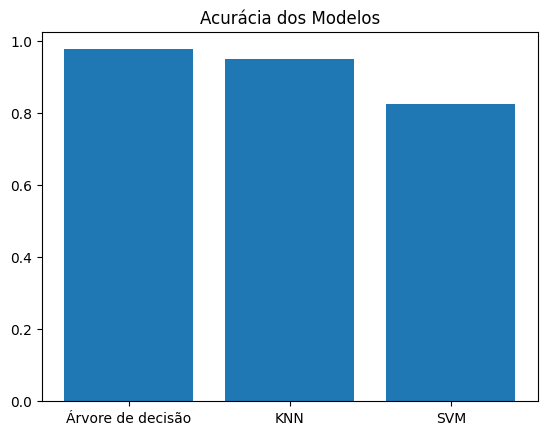

In [54]:
# Plotagem das métricas
plt.bar(range(len(models)), list(models.values()))
plt.xticks(range(len(models)), list(models.keys()))
plt.title('Acurácia dos Modelos')
plt.show()

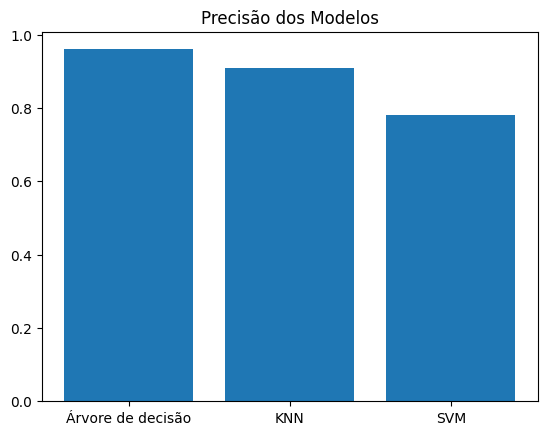

In [55]:
# Nomes dos modelos
modelos = ['Árvore de decisão', 'KNN', 'SVM']

# Valores de precisão cada modelo
precisao = [0.96, 0.91, 0.78]

# gráfico de barras
plt.bar(modelos, precisao)
plt.title('Precisão dos Modelos')
plt.show()

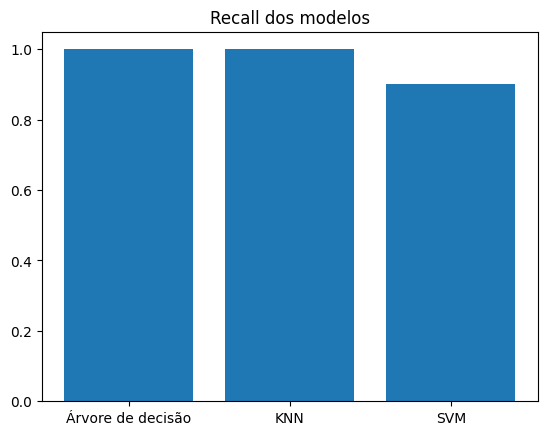

In [58]:
# Nomes dos modelos
modelos = ['Árvore de decisão', 'KNN', 'SVM']

# Valores de precisão cada modelo
recall = [1, 1, 0.9]

# gráfico de barras
plt.bar(modelos, recall)
plt.title('Recall dos modelos')
plt.show()

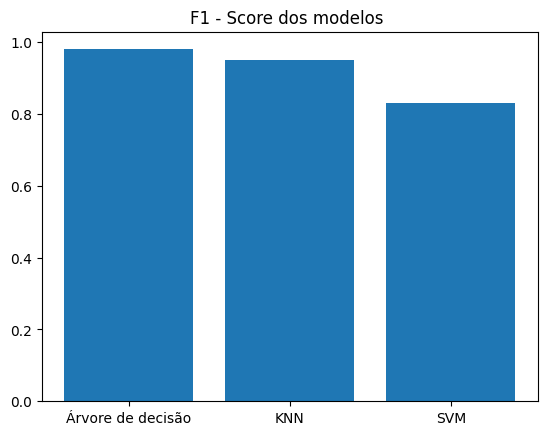

In [59]:
# Nomes dos modelos
modelos = ['Árvore de decisão', 'KNN', 'SVM']

# Valores de precisão cada modelo
f1 = [0.98, 0.95, 0.83]

# gráfico de barras
plt.bar(modelos, f1)
plt.title('F1 - Score dos modelos ')
plt.show()

## **Conclusão**
* A alta acurácia indica que os modelos são eficazes em fazer previsões precisas sobre os casos de AVC, em relação ao total de previsões;

* A alta precisão sugere que a maioria das previsões positivas do modelo é verdadeira. Em um contexto de previsão de AVC, isso significa que o modelo minimiza os falsos positivos, evitando a classificação incorreta de pessoas saudáveis como tendo AVC;

* O alto recall é importante em aplicações de prevenção de AVC, pois indica que o modelo está identificando a maioria dos casos reais de AVC.

* O alto F1-score indica um equilíbrio eficaz entre a capacidade do modelo de fazer previsões precisas e identificar casos de AVC.

* Esses resultados são um reflexo da capacidade do modelo de fazer previsões precisas e consistentes em relação aos rótulos de classe